# Ford GoBike System Data Exploration
## by Sultanah Aldossari

## Introduction
> **About dataset:** The dataset include information about bike trips on February 2019. consist of 183,412 observations and 16 features. 9 of the features are numeric the rest are catagorical variable. The dataset include:

- `duration_sec:` Trip duration in seconds
- `start_time:`	Trip start time and date
- `end_time:` Trip end time and date
- `start_station_id:` Trip start station id
- `start_station_name:` Station name
- `start_station_latitude:` Start station latitude
- `start_station_longitude`	Start station longitude 
- `end_station_id:`	Trip end station ID
- `end_station_name:` Trip end station name	
- `end_station_latitude:` End Station Latitude
- `end_station_longitude:` End Station Longitude
- `bike_id:`	Bike ID
- `user_type:`	User type whether a subscriber or a customer -- (“Subscriber” = Member or “Customer” = Casual)
- `member_birth_year:`	User birth year
- `member_gender:`	User gender whether a female or male
- `bike_share_for_all_trip`


## Preliminary Wrangling


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import datetime as dt
%matplotlib inline

## Gather Data

In [2]:
df = pd.read_csv('tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


### What is the structure of your dataset?

> The dataset consist of 183,412 observations and 16 features. 9 of the features are numeric the rest are catagorical variable. As it appears there are some missing values

### What is/are the main feature(s) of interest in your dataset?

> We can derive several valuable information from the dataset. For instance, we can answer these questions using the above dataset: 
- Which days have the highest number of trips?
- Which hours have the highest number of trips?
- Who have the highest number of trips customer or subscriber?
- In what age trips have the highest peaks? Is there a Significant relation between age the bike riding?
- Does gender affect bike riding?
- What is the longest trip time? does poeple tend to use bikes for long or short time?
- Which days customer and subscribers uses bikes?
- Top 5 stations

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> start and end time, station name, gender, user type, birth date, and duration in seconds

> Derived features/variables to assist exploration and analysis: start_date, start_time_hours, weekday, member_age, age_bins, age_group

## Assess Data

> During this step, an overall exploring on data is done for further understanding. Also, try to find any quality or tidiness issue

In [3]:
#Display how many rows and columns we have in dataset
df.shape

(183412, 16)

In [4]:
#Display overall information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
#Display how many null vlues we have in th dataset
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [6]:
#no duplicate were found in the dataset
df.duplicated().sum()

0

In [7]:
#Display number of counts in each column with catagorical type
df.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [8]:
df.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [9]:
df.bike_id.nunique()

4646

In [10]:
df.start_station_name.value_counts()

Market St at 10th St                                         3904
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3544
Berry St at 4th St                                           3052
Montgomery St BART Station (Market St at 2nd St)             2895
Powell St BART Station (Market St at 4th St)                 2760
                                                             ... 
Willow St at Vine St                                            9
Parker Ave at McAllister St                                     7
Palm St at Willow St                                            4
21st Ave at International Blvd                                  4
16th St Depot                                                   2
Name: start_station_name, Length: 329, dtype: int64

In [11]:
df.start_station_name.nunique()

329

In [12]:
df.bike_share_for_all_trip.value_counts()

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

In [13]:
df.member_birth_year.value_counts().sort_values()

1927.0        1
1928.0        1
1910.0        1
1930.0        1
1878.0        1
          ...  
1991.0     8498
1990.0     8658
1989.0     8972
1993.0     9325
1988.0    10236
Name: member_birth_year, Length: 75, dtype: int64

## Cleaning Data

**define**
- Drop unwanted columns and columns with missing values
- Change station name to string type
- Change birth year from float to int type
- Change gender type to string type
- Change user_type to string type
- Change duration(start, end) time to datetime format
- Feature Engineering: days of week, months and hours, age, duration in minutes

**code**

In [14]:
#First make a copy of our dataset
df2 = df.copy()

In [15]:
df2['start_time'] = pd.to_datetime(df2['start_time'])
df2['end_time'] = pd.to_datetime(df2['end_time'])

In [16]:
df2.drop(['start_station_latitude', 'start_station_longitude', 'start_station_id', 'end_station_id','end_station_latitude', 'end_station_longitude'], axis=1, inplace=True)

In [17]:
df.dropna(inplace=True)

`Feature Engineering`

In [18]:
df2['duration_minute'] = df2['duration_sec']/60
df2['member_age'] = 2019 - df2['member_birth_year']
df2 = df2[df2['member_age'] <=60]
df2['start_time_hour'] = df2['start_time'].dt.hour
df2['weekday'] = df2[['start_time']].apply(lambda x: dt.datetime.strftime(x['start_time'], '%A'), axis=1)

In [19]:
df2['age_bins'] = pd.cut(x=df2['member_age'], bins=[15, 20, 30, 40,50, 60])

In [20]:
bins = [10,20,30,40,50,60]
labels=['kids','young adult','middle-aged adult','old-aged adults','senior']
df2['bins'] = pd.cut(df2['member_age'], bins=bins, labels=labels)

 `Changing Data Types`

In [21]:
df2['user_type'] = df2['user_type'].astype('category')
df2['member_gender'] = df2['member_gender'].astype('category')
df2['start_station_name'] = df2['start_station_name'].astype(str)
df2['end_station_name'] = df2['end_station_name'].astype(str)
df2['weekday'] = df2['weekday'].astype(str)
df2['member_birth_year'] = df2['member_birth_year'].astype(int)
df2['member_age'] = df2['member_age'].astype(int)
df2['start_time_hour'] = df2['start_time_hour'].astype(int)

**test**

In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171617 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             171617 non-null  int64         
 1   start_time               171617 non-null  datetime64[ns]
 2   end_time                 171617 non-null  datetime64[ns]
 3   start_station_name       171617 non-null  object        
 4   end_station_name         171617 non-null  object        
 5   bike_id                  171617 non-null  int64         
 6   user_type                171617 non-null  category      
 7   member_birth_year        171617 non-null  int64         
 8   member_gender            171617 non-null  category      
 9   bike_share_for_all_trip  171617 non-null  object        
 10  duration_minute          171617 non-null  float64       
 11  member_age               171617 non-null  int64         
 12  start_time_hour 

In [23]:
df2.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_name         0
end_station_name           0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
duration_minute            0
member_age                 0
start_time_hour            0
weekday                    0
age_bins                   0
bins                       0
dtype: int64

In [24]:
df2.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_minute,member_age,start_time_hour,weekday,age_bins,bins
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984,Male,No,869.750000,35,17,Thursday,"(30, 40]",middle-aged adult
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,No,1030.900000,47,12,Thursday,"(40, 50]",old-aged adults
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989,Other,No,608.166667,30,17,Thursday,"(20, 30]",young adult
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974,Male,Yes,26.416667,45,23,Thursday,"(40, 50]",old-aged adults
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,1959,Male,No,29.883333,60,23,Thursday,"(50, 60]",senior


# Univariate Exploration

> At this section, several individual variables investigation  are conducted.

### 1- Which days have the highest number of bike trips?

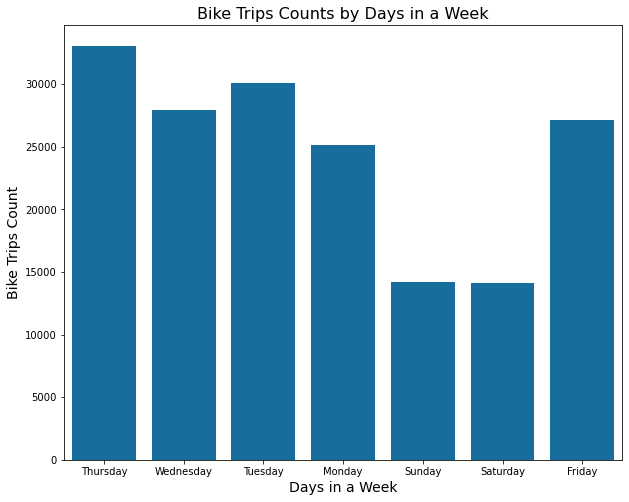

In [31]:
plt.figure(figsize=(10,8))
color = sns.color_palette('colorblind')[0]
sns.countplot(x = 'weekday', data = df2, color=color)
plt.title('Bike Trips Counts by Days in a Week', fontsize='16')
plt.xlabel('Days in a Week',fontsize='14')
plt.ylabel('Bike Trips Count', fontsize='14');

> **Insight:** I started to look at the counts and distribution of weekdays. As shown in the plot above we can conclude that on weekdays the number of trips increases unlike on weekends were number of trips decreased sharply. and usually the reason is people on weekdays tend use bikes to go to their work, shops, do some activities. And people on weekends do rest.

### 2- The distribution of Bike Users Age based on the number of trips:

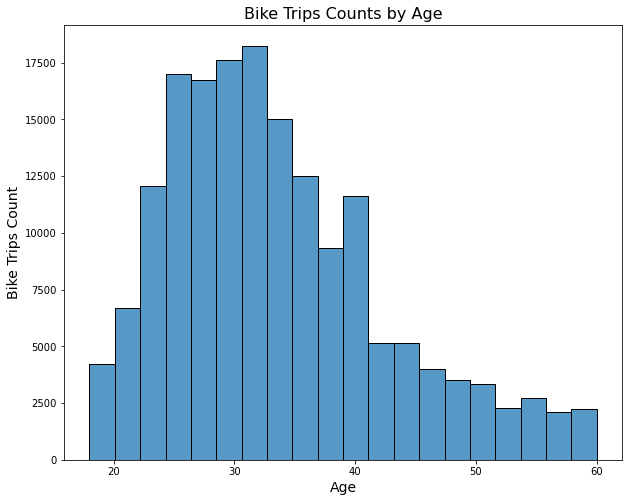

In [80]:
plt.figure(figsize=(10,8))
sns.histplot(x = 'member_age', data = df2, color=color,bins=20)
plt.title('Bike Trips Counts by Age', fontsize='16')
plt.xlabel('Age',fontsize='14')
plt.ylabel('Bike Trips Count', fontsize='14');

> **Insight:** Based on the above plot, we see that the average age range of FordGo Bikes is between 25 to 35, and then it starts to decrease as age increases. 

### 3- Trips by Age Group:

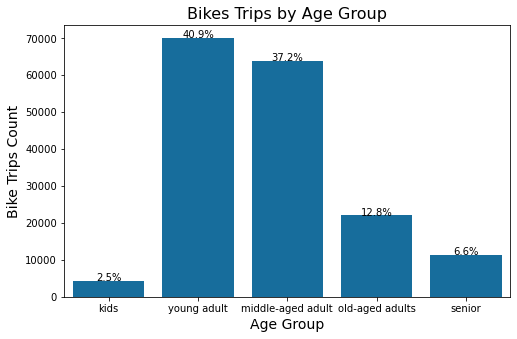

In [79]:
#Code-Source: https://www.codegrepper.com/code-examples/python/how+to+add+percentage+in+countplot
plt.figure(figsize=(8,5))
ax = sns.countplot(x="bins", data=df2,color = color)
plt.title('Bikes Trips by Age Group', fontsize=16)
plt.xlabel('Age Group',fontsize='14')
plt.ylabel('Bike Trips Count', fontsize='14');
total = df2.shape[0]
bins_counts = df2['bins'].value_counts()
locs, labels = plt.xticks()

# print frequency on the bar chart
for loc, label in zip(locs, labels):
    count = bins_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/total)
    plt.text(loc, count-8, pct_string, ha='center')


> **Innsight:** As seen on the above plot, the most bike trips is for young adults [20,30]Y and middle aged [40,50]Y. 

### 4- Users Types and how it influence bike trips rides:

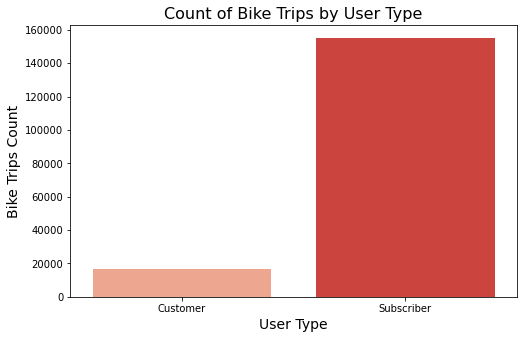

In [77]:
plt.figure(figsize=(8,5))
sns.countplot(data=df2, x='user_type',palette='Reds')
plt.title('Count of Bike Trips by User Type', fontsize=16)
plt.ylabel('Bike Trips Count', fontsize=14)
plt.xlabel('User Type', fontsize=14);

> **Insight** as shown in the plot, mostly 90% of bikes trips are made by Subscribers, for Customers there are few bike trips compared to subscribers, which maybe indicates that they use it primarily for leisure purposes.

### 5- Bikes Trips by Gender

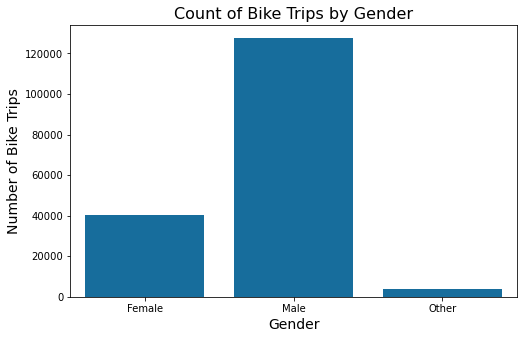

In [82]:
plt.figure(figsize=(8,5))
sns.countplot(data=df2, x='member_gender',color = color)
plt.title('Count of Bike Trips by Gender', fontsize=16)
plt.ylabel('Number of Bike Trips', fontsize=14)
plt.xlabel('Gender', fontsize=14);

> **Insight** Bike riders members are mainly Male members and few are females members, this certainly helps in marketing campaigns as it simplify the targeted segment.

### 6- Top 5 Start Stations

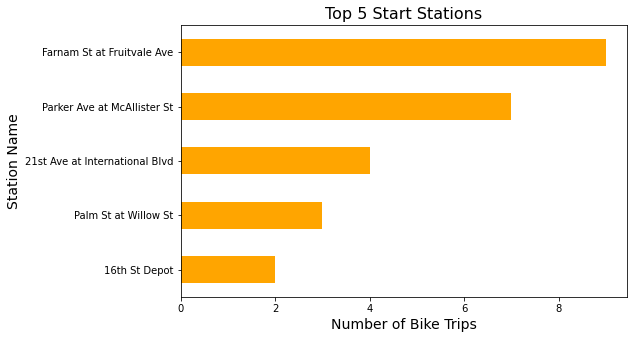

In [88]:
plt.figure(figsize=(8,5))
df.start_station_name.value_counts(sort=True, ascending=True)[:5].plot(kind='barh', color='Orange');
plt.title('Top 5 Start Stations',fontsize=16)
plt.xlabel('Number of Bike Trips',fontsize=14)
plt.ylabel('Station Name' ,fontsize=14);

> **Insight** Based on the above plot, Willow st Vine st have the highest traffic.

### 7- Top 5 End Stations

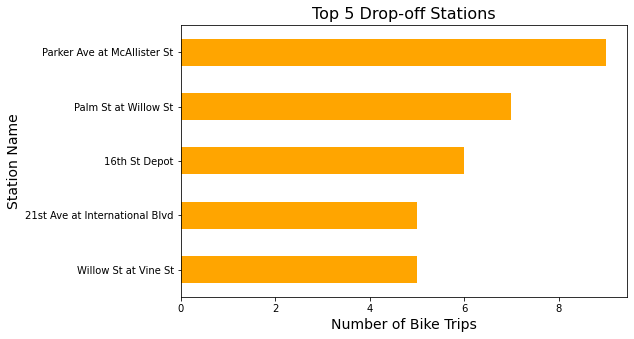

In [89]:
plt.figure(figsize=(8,5))
df.end_station_name.value_counts(sort=True, ascending=True)[:5].plot(kind='barh', color='Orange');
plt.title('Top 5 Drop-off Stations',fontsize=16)
plt.xlabel('Number of Bike Trips',fontsize=14)
plt.ylabel('Station Name' ,fontsize=14);

> **Insight** Based on the above plot, Parker ave at McAllister St have the highest traffic.

### 8- Bike Usage by Gender (Pie Plot)

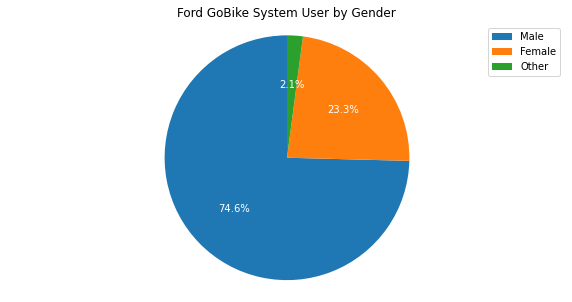

In [90]:
#Ref: https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html

gender = df.member_gender.value_counts()
fig1, ax1 = plt.subplots(figsize=(10,5))
ax1.pie(gender, labels = gender.index, autopct='%1.1f%%', shadow=False, startangle=90, textprops={'color':'white'})
ax1.axis('equal')
plt.legend(labels =gender.index, loc="best")
plt.title("Ford GoBike System User by Gender");

> **Insight:** Another kind of plot that Illustrate how many bikes rides for each gender, and as shown male seems to have the highest bike rides unlike females.

### 9- Distripution of bikes trips by hours in a day

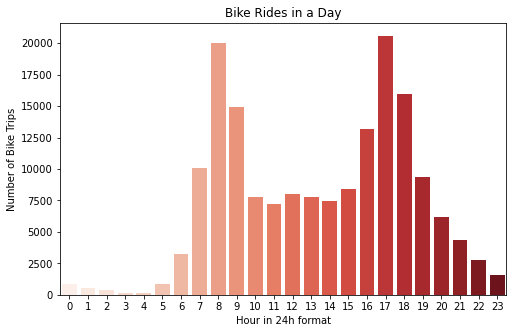

In [93]:
plt.figure(figsize=(8,5))
sns.countplot(data = df2, x='start_time_hour', palette = 'Reds')
plt.title("Bike Rides in a Day")
plt.xlabel("Hour in 24h format")
plt.ylabel("Number of Bike Trips")
plt.show();

> **Insight**  In the plot above, it is obvious that in the morning and afternoon are the highest bike rides of the day and this maybe due to work hours, where bike riders may usually take trip from and to work

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Based on the univariate exploring, I noticed that there were more trips on weekdays(from Monday till Friday) more than on weekends. Peaking hours are around 7-9 AM and 16-18 PM, which means that major propotion of bike usage are for daily commute to work. Also, A large propotion of bike riders are males and few are females. Most bike riders were between 25 and 40 years old.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
> I did not face any problem during my investigation. FordGo bike Data is a very straight forward dataset. As of now, the data indicates that adults in the average working age range are the primary users of the system, and they use the bikes daily for commuting.

## Bivariate Exploration

### 10- User Type by Day Of Week

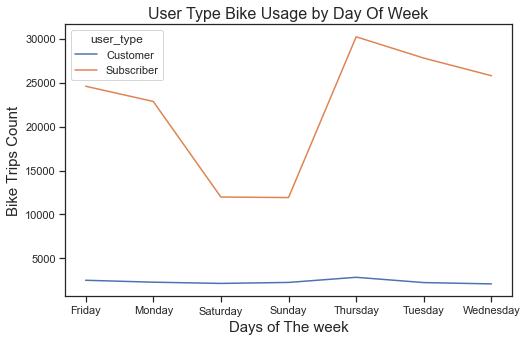

In [126]:
plt.figure(figsize=(8,5))
mask = df2.groupby(['weekday', 'user_type']).size().reset_index()
c= sns.lineplot(data=mask, x="weekday",y=0, hue="user_type")
c.set_title('User Type Bike Usage by Day Of Week', fontsize=16)
c.set_ylabel("Bike Trips Count", fontsize = 15)
c.set_xlabel("Days of The week", fontsize = 15);

> **Insight:** The above plot effectively illustrates the stark difference between Customers and Subscribers. In general, the bike share system is not very popular with customers; usage increases on weekends. The opposite is true for subscribers - on weekdays, usage has been high, but on weekends, usage has declined sharply.

### 11- User Type by Day of week 

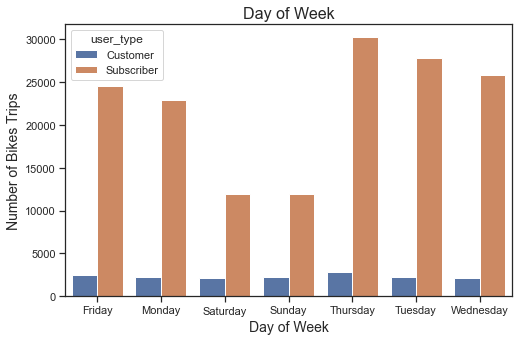

In [147]:
plt.figure(figsize=(8,5))
sns.barplot(data=mask, x="weekday",y=0, hue="user_type")
plt.title('Day of Week',fontsize=16)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Number of Bikes Trips', fontsize=14);

> **Insights:** The number of subscribers was higher than the number of casual customers. On weekends, there is a severe decline in volume for subscribers, which suggests that they use their bicycles primarily to commute to work during the week, whereas on weekends, there is a slight increase in volume for customers, which suggests that the use is primarily leisure/touring and relaxing.

## 12- User Type by hours

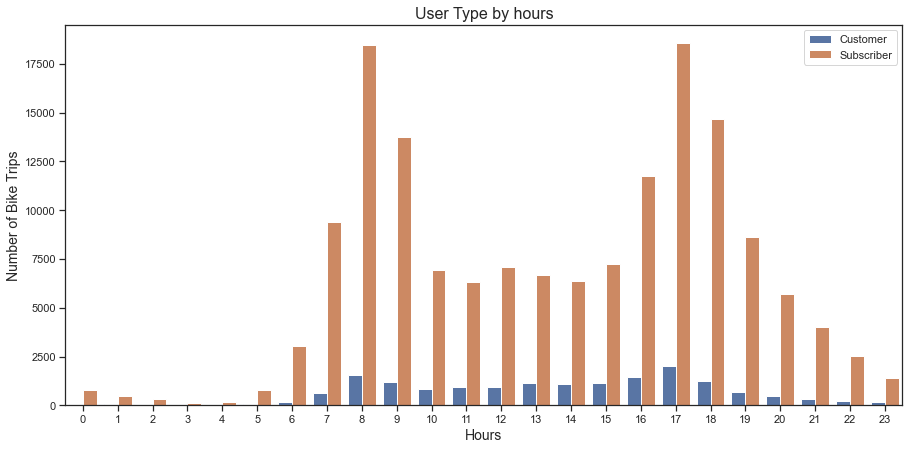

In [153]:
mask2 = df2.groupby(['start_time_hour', 'user_type']).size().reset_index()
plt.figure(figsize=(15,7))
p = sns.countplot(data = df2, x = 'start_time_hour', hue = 'user_type')
p.legend();
plt.title('User Type by hours', fontsize=16)
plt.xlabel('Hours', fontsize=14)
plt.ylabel('Number of Bike Trips', fontsize=14);

> **Insights:** The number of subscribers was higher than the number of casual customers. we can see from the plot  clearly peaks out on typical rush hours when people go to work in the morning and getting off work in the afternoon

## 13- Weekday by Member's Age

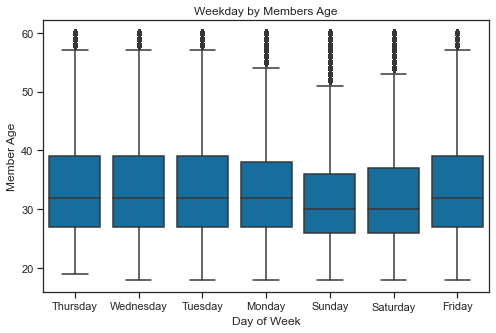

In [158]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df2, x='weekday', y='member_age', color=color)
plt.title('Weekday by Members Age')
plt.xlabel('Day of Week')
plt.ylabel('Member Age');

> **Insight:** There is a slight age difference between renters of bikes who ride from Monday through Friday and weekend renters, which corresponds to the commute to work patterns observed in the univariable exploration plots above.

## 14- User Type by Age

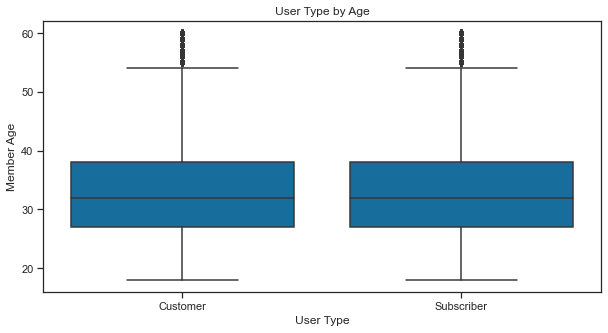

In [163]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df2 , x='user_type', y='member_age', color=color);
plt.title('User Type by Age')
plt.xlabel('User Type');
plt.ylabel('Member Age');

> **Insights:** As shown in the above plot, Subscribers and customer appears to be similarly in age

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Based on bivariate investigation, we discovered different behavior usage between customers and subscribers. Customers are more likely to be casual riders, like tourists or students on vacation. Subscribers, on the other hand, tend to be daily commuters and full-time students who mostly use the system during weekdays, in better weather, and mainly for shorter distances. They tend to rent bikes during the morning and evening of a typical work or school day (8-9am and 5-6pm).

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> It varies between subscribers and customers in the time it takes to use bikes. Subscribers during weekends use their bicycles largely to commute during the week, whereas on weekends, there is a slight increase in customers, which indicates that they use it primarily for leisure purposes.

## Multivariate Exploration

### 15- Average trip duration by weekdays between customers and subscribers

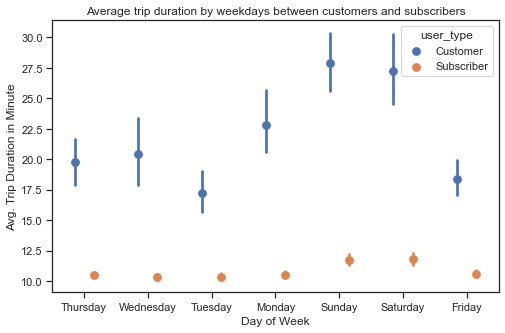

In [161]:
plt.figure(figsize=[8,5])
sns.pointplot(data=df2, x='weekday', y='duration_minute', hue='user_type', dodge=0.3, linestyles="");
plt.title('Average trip duration by weekdays between customers and subscribers');
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');

> **Insight:** This plot shows that subscribers ride much shorter/quicker trips than customers on every day of the week. In particular, casual riders ride longer on Saturdays and Sundays than on other days of the week. The average duration of subscription usage seems to be more consistent between customers and subscribers.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In the multivariate exploration, several patterns were confirmed that had been discovered in the previous bivariate analysis as well as the univariate analysis. According to subscribers, the majority of use occurs on Monday through Friday during rush hours, indicating a primary use for work commutes. Based on the more relaxed and flexible use pattern of customers, it's clear that they might be using the system quite differently than subscribers, probably primarily over weekends and in the afternoon, for leisure purposes or city tours.

### Were there any interesting or surprising interactions between features?

> Throughout the exploration, there is a great deal of difference between male and female usage habits, which may be due to a greater number of male riders/records compared to female ones. If there were more data on females, it would be interesting to see how they use the system differently.

# Key Insights:

- On weekdays the number of trips increases unlike on weekends were number of trips decreased sharply. and usually the reason is people on weekdays tend use bikes to go to their work, shops, do some activities. And people on weekends do rest.
- The average age range of FordGo Bikes is between 25 to 35, and then it starts to decrease as age increases. 
- The most bike trips is for young adults [20,30]Y and middle aged [40,50]Y.
- Mostly 90% of bikes trips are made by Subscribers, for Customers there are few bike trips compared to subscribers, which maybe indicates that they use it primarily for leisure purposes.
- Bike riders members are mainly Male members and few are females members, this certainly helps in marketing campaigns as it simplify the targeted segment.
- Willow st Vine st have the highest traffic etart Station.
- Parker ave at McAllister St have the highest traffic end Station.
- In the morning (7-9AM) and afternoon (5-6PM) are the highest bike rides of the day.
- In general, the bike share system is not very popular with customers; usage increases on weekends. The opposite is true for subscribers - on weekdays, usage has been high, but on weekends, usage has declined sharply.
- On weekends, there is a severe decline in volume for subscribers, which suggests that they use their bicycles primarily to commute to work during the week, whereas on weekends, there is a slight increase in volume for customers, which suggests that the use is primarily leisure/touring and relaxing.
- The number of subscribers was higher than the number of casual customers. we can see from the plot  clearly peaks out on typical rush hours when people go to work in the morning and getting off work in the afternoon
- There is a slight age difference between renters of bikes who ride from Monday through Friday and weekend renters, which corresponds to the commute to work patterns observed in the univariable exploration plots above.
- The average duration of subscription usage seems to be more consistent between customers and subscribers.

# Conclusion

Since FordGo Bikes are affordable and convenient transportation for anyone, this project will benefit a substantial number of people. Customers will also be able to walk around the city in a flexible and sustainable manner. In the analysis, the service is convenient for subscribers. With Ford GoBikes, you can move around the city in a sustainable way, whether for work or leisure. Customers and subscribers alike can utilize the system. Most subscribers commute to and from work on a daily basis. On weekdays, it rents bikes from 8 a.m. to 9 a.m. and from 5 a.m. to 6 p.m., sometimes during lunchtime. Most users are tourists and occasional riders who use the system on weekends to explore the Bay Area.

In [164]:
df2.to_csv('trips2019.csv')